
**<font size="3">Image Classification</font>**
1. [Data Preparation](#Data_prep)<br>
    1.1. [Organizing Data](#Organizing_data)<br>
    1.2. [Decode And Convert Image to Tensor](#Decode_Conv_Tensor)<br>
2. [Model0: Basic CNN](#Model0_Basic_CNN)<br>
    2.1. [Model0 Architecture](#Model0_Architecture)<br>
    2.2. [Model0 Fit](#Model0_Fit)<br>
    2.3. [Model0 Evaluate](#Model0_Evaluate)<br>
3. [Model1: CNN](#Model1_CNN)<br>
    3.1. [Model1 Architecture](#Model1_Architecture)<br>
    3.2. [Model1 Fit](#Model1_Fit)<br>
    3.3. [Model1 Evalaute](#Model1_Evaluate)<br>   
4. [Modela: CNN with Data Augmentation](#Modela_CNN_DataAug)<br>
    4.1. [Modela Architecture](#Modela_Architecture)<br>
    4.2. [Modela Fit](#Modela_Fit)<br>
    4.3. [Modela Evaluation](#Modela_Evaluation)<br>


**Dataset:** This dataset comes from a 2013 Kaggle competition (Kaggle - https://www.kaggle.com/c/dogs-vs-cats) \
The dataset consists of 25 000 images of dogs and cats. Each image is a JPEG file. \


**Goal:** The simple goal is to train a model to correctly classify a new image as a cat or a dog. Building a deep network and training the model with tens of thousands of images is likely to succeed. However the computational expense and the required time will be high. Further, in many practical situations only a limited number of sample images may be available. Therefore, the attempt here is to use only a few images to train a model to perform the task. Convolutional neural networks (CNN) will be used to build the classifier. CNNs are good at learning local patterns and at building hierarchies of pattern to learn the image. One of the issues to deal with here is that the images may have additional features such a basket or a human as can be seen in the sample images below. This along with the limited number of samples will be two big obstacles to training high performing CNN models. 

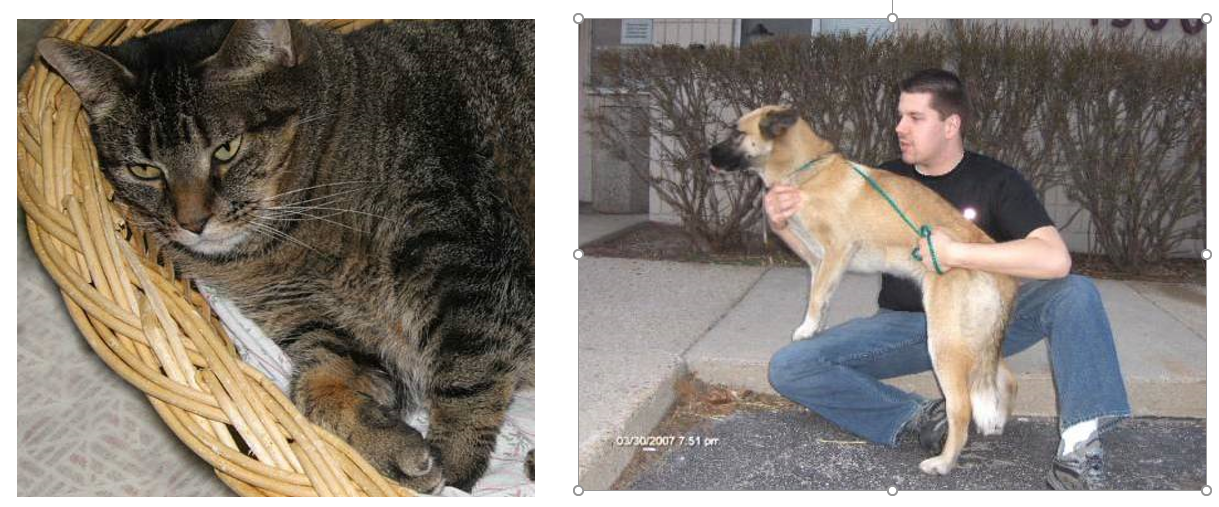

**Data preparation:** Most machine learning datasets consists of feature and labels one row for per example. All the data is typically organized in a large file. This data consists of a collection of JPEG images. There are equal number of images of cats and dogs, i.e. it is a balanced data. A total of 2500 images of each category are used for training, validation and testing. These images are split between train, validation and test directories. Each of these directories consists of a cat and a dog sub-directories. The sub-directory "cat" holds the images of cats only, and the sub-directory "dog" hold the images of dogs only. One thousand images of each of the two categories are used for training. Five hundred images of each of the categories are used for validation. For testing, one thousand images of each of the categories are used.

In [4]:
#import tensorflow.compat.v1 as tf
#tf.disable_v2_behavior()
import tensorflow as tf
from tensorflow import constant, reduce_sum
from tensorflow import ones, add, matmul, multiply
from tensorflow import keras

import pandas as pd
import numpy as np
from keras.models import Sequential
from keras import models
from keras import layers

import matplotlib.pyplot as plt
import seaborn as sns
from keras.callbacks import EarlyStopping
from tensorflow.keras.preprocessing import image_dataset_from_directory

<a id='Data_Preparation'></a>
## 1. Data Preparation

<a id='Organizing_Data'></a>
## 1.1. Organizing Data

In [1]:
from zipfile import ZipFile
file_name_cattrain = '/content/catdirsmalltrain.zip'
file_name_dogtrain = '/content/dogdirsmalltrain.zip'
file_name_dogval = '/content/dogsmallval.zip'
file_name_catval = '/content/catsmallval.zip'
file_name_dogtest = '/content/dogsmalltest.zip'
file_name_cattest = '/content/catsmalltest.zip'

with ZipFile(file_name_cattrain, 'r') as zip:
  zip.extractall()
  print('Done')
with ZipFile(file_name_dogtrain, 'r') as zip:
  zip.extractall()
  print('Done')
with ZipFile(file_name_dogval, 'r') as zip:
  zip.extractall()
  print('Done')
with ZipFile(file_name_catval, 'r') as zip:
  zip.extractall()
  print('Done')
with ZipFile(file_name_dogtest, 'r') as zip:
  zip.extractall()
  print('Done')
with ZipFile(file_name_cattest, 'r') as zip:
  zip.extractall()
  print('Done')

Done
Done
Done
Done
Done
Done


In [2]:
!mkdir cats_vs_dogs_smalldata
!mkdir cats_vs_dogs_smalldata/train
!mkdir cats_vs_dogs_smalldata/validation
!mkdir cats_vs_dogs_smalldata/test

In [3]:
!mv /content/catdirsmalltrain /content/cats_vs_dogs_smalldata/train/cat
!mv /content/dogdirsmalltrain /content/cats_vs_dogs_smalldata/train/dog
!mv /content/catsmalltest /content/cats_vs_dogs_smalldata/test/cat
!mv /content/catsmallval /content/cats_vs_dogs_smalldata/validation/cat
!mv /content/dogsmalltest /content/cats_vs_dogs_smalldata/test/dog
!mv /content/dogsmallval /content/cats_vs_dogs_smalldata/validation/dog

In [ ]:
print(tf.__version__)

2.6.0


<a id='Decode_Conv_Tensor'></a>
## 1.2. Decode and Convert Image to Tensor

In [5]:
import os, shutil, pathlib
new_base_dir = pathlib.Path("cats_vs_dogs_smalldata")

In [6]:
train_dataset = image_dataset_from_directory(new_base_dir/"train", image_size = (180,180), batch_size=32)
validation_dataset = image_dataset_from_directory(new_base_dir/"validation", image_size = (180,180), batch_size=32)
test_dataset = image_dataset_from_directory(new_base_dir/"test", image_size = (180,180), batch_size=32)

Found 2002 files belonging to 2 classes.
Found 1000 files belonging to 2 classes.
Found 2000 files belonging to 2 classes.


In [7]:
for data_batch, labels_batch in train_dataset:
    print("data batch shape:",data_batch.shape)
    print('labels batch shape:',labels_batch.shape)
    break

data batch shape: (32, 180, 180, 3)
labels batch shape: (32,)


<a id='Model0_Basic_CNN'></a>
## 2.0. Model0: Basic CNN

<a id='Model0_Architecture'></a>
## 2.1. Model0: Architecture

In [8]:
model0 = Sequential()
model0.add(layers.Rescaling(1./255))
model0.add(layers.Conv2D(filters=32, kernel_size=3, activation="relu"))
model0.add(layers.MaxPooling2D(pool_size=2))
model0.add(layers.Conv2D(filters=64, kernel_size=3, activation="relu"))
model0.add(layers.MaxPooling2D(pool_size=2))
model0.add(layers.Conv2D(filters=128, kernel_size=3, activation="relu"))
model0.add(layers.MaxPooling2D(pool_size=2))
model0.add(layers.Conv2D(filters=256, kernel_size=3, activation="relu"))
model0.add(layers.MaxPooling2D(pool_size=2))
model0.add(layers.Conv2D(filters=256, kernel_size=3, activation="relu"))
model0.add(layers.Flatten())
model0.add(layers.Dense(1,activation='sigmoid'))

In [10]:
model0.compile(loss='binary_crossentropy',optimizer='rmsprop',metrics=['accuracy'])

<a id='Model0_Fit'></a>
## 2.2. Model0: Fit

In [11]:
callbacks = [
             keras.callbacks.ModelCheckpoint(filepath="cnn_basic.keras",save_best_only=True,monitor='val_loss')
             ]
history0 = model0.fit(train_dataset,
          epochs=15,
          validation_data=validation_dataset,
          callbacks=callbacks)

Epoch 1/15
63/63 [==============================] - 167s 3s/step - loss: 0.7032 - accuracy: 0.5075 - val_loss: 0.6882 - val_accuracy: 0.5750
Epoch 2/15
63/63 [==============================] - 164s 3s/step - loss: 0.7125 - accuracy: 0.5769 - val_loss: 0.6715 - val_accuracy: 0.6150
Epoch 3/15
63/63 [==============================] - 163s 3s/step - loss: 0.6690 - accuracy: 0.6044 - val_loss: 0.6468 - val_accuracy: 0.6350
Epoch 4/15
63/63 [==============================] - 163s 3s/step - loss: 0.6304 - accuracy: 0.6653 - val_loss: 0.6361 - val_accuracy: 0.6200
Epoch 5/15
63/63 [==============================] - 163s 3s/step - loss: 0.5915 - accuracy: 0.6843 - val_loss: 0.6062 - val_accuracy: 0.6550
Epoch 6/15
63/63 [==============================] - 162s 3s/step - loss: 0.5573 - accuracy: 0.7148 - val_loss: 0.5971 - val_accuracy: 0.6700
Epoch 7/15
63/63 [==============================] - 163s 3s/step - loss: 0.5236 - accuracy: 0.7353 - val_loss: 0.6058 - val_accuracy: 0.6900
Epoch 8/15
63

In [12]:
model0.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
rescaling (Rescaling)        (None, 180, 180, 3)       0         
_________________________________________________________________
conv2d (Conv2D)              (None, 178, 178, 32)      896       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 89, 89, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 87, 87, 64)        18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 43, 43, 64)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 41, 41, 128)       73856     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 20, 20, 128)       0

<a id='Model0_Evaluate'></a>
## 2.3. Model0: Evaluate

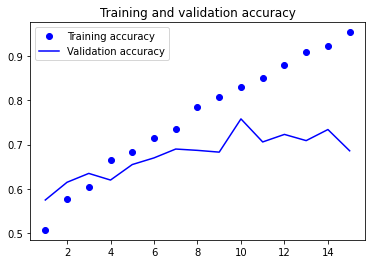

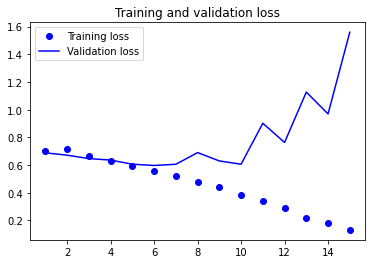

In [17]:
accuracy = history0.history["accuracy"]
val_accuracy = history0.history["val_accuracy"]
loss = history0.history["loss"]
val_loss = history0.history["val_loss"]
epochs = range(1, len(accuracy) + 1)
plt.plot(epochs, accuracy, "bo", label="Training accuracy")
plt.plot(epochs, val_accuracy, "b", label="Validation accuracy")
plt.title("Training and validation accuracy")
plt.legend()
plt.figure()
plt.plot(epochs, loss, "bo", label="Training loss")
plt.plot(epochs, val_loss, "b", label="Validation loss")
plt.title("Training and validation loss")
plt.legend()
plt.show()

In [14]:
test_model = keras.models.load_model('cnn_basic.keras')
test_loss, test_acc = test_model.evaluate(test_dataset)
print(f"Test accuracy: {test_acc:.2f}")

63/63 [==============================] - 40s 628ms/step - loss: 0.5913 - accuracy: 0.6835
Test accuracy: 0.68


**Observation:**
The accuracy plot shows that while the training accuracy improves, the validation accuracy stalls. The loss plot shows that the validation loss increases with epochs. This indicates overfitting. Despite the overfitting, the basic CNN model performed averagely on the test dataset. Next we explore if adding additional convolution layers will help the model discover the local patterns and hierarchies at the cost of increasing the model parameters.

<a id='Model1_CNN'></a>
## 3.0. Model1: CNN

<a id='Model1_Architecture'></a>
## 3.1. Model1: Architecture

In [ ]:
model1 = Sequential()
model1.add(layers.Rescaling(1./255))
model1.add(layers.Conv2D(filters=32, kernel_size=3, activation="relu"))
model1.add(layers.Conv2D(filters=32, kernel_size=3, activation="relu"))
model1.add(layers.MaxPooling2D(pool_size=2))
model1.add(layers.Conv2D(filters=64, kernel_size=3, activation="relu"))
model1.add(layers.Conv2D(filters=64, kernel_size=3, activation="relu"))
model1.add(layers.MaxPooling2D(pool_size=2))
model1.add(layers.Conv2D(filters=128, kernel_size=3, activation="relu"))
model1.add(layers.Conv2D(filters=128, kernel_size=3, activation="relu"))
model1.add(layers.MaxPooling2D(pool_size=2))
model1.add(layers.Conv2D(filters=256, kernel_size=3, activation="relu"))
model1.add(layers.MaxPooling2D(pool_size=2))
model1.add(layers.Conv2D(filters=256, kernel_size=3, activation="relu"))
model1.add(layers.Flatten())
model1.add(layers.Dense(1,activation='sigmoid'))

In [ ]:
model1.compile(loss='binary_crossentropy',optimizer='rmsprop',metrics=['accuracy'])

<a id='Model1_Fit'></a>
## 3.2. Model1: Fit

In [ ]:
callbacks = [
             keras.callbacks.ModelCheckpoint(filepath="cnn.keras",save_best_only=True,monitor='val_loss')
             ]
history1 = model1.fit(train_dataset,
          epochs=15,
          validation_data=validation_dataset,
          callbacks=callbacks)

Epoch 1/15
63/63 [==============================] - 382s 6s/step - loss: 0.7291 - accuracy: 0.4860 - val_loss: 0.6935 - val_accuracy: 0.5000
Epoch 2/15
63/63 [==============================] - 378s 6s/step - loss: 0.6946 - accuracy: 0.4900 - val_loss: 0.6920 - val_accuracy: 0.5000
Epoch 3/15
63/63 [==============================] - 378s 6s/step - loss: 0.7011 - accuracy: 0.5080 - val_loss: 0.6838 - val_accuracy: 0.5720
Epoch 4/15
63/63 [==============================] - 378s 6s/step - loss: 0.6930 - accuracy: 0.5265 - val_loss: 0.6961 - val_accuracy: 0.5150
Epoch 5/15
63/63 [==============================] - 379s 6s/step - loss: 0.7179 - accuracy: 0.5375 - val_loss: 0.6846 - val_accuracy: 0.5460
Epoch 6/15
63/63 [==============================] - 378s 6s/step - loss: 0.7047 - accuracy: 0.5514 - val_loss: 0.6811 - val_accuracy: 0.5750
Epoch 7/15
63/63 [==============================] - 380s 6s/step - loss: 0.7121 - accuracy: 0.5994 - val_loss: 0.7724 - val_accuracy: 0.5230
Epoch 8/15
63

In [ ]:
model1.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
rescaling (Rescaling)        (None, 180, 180, 3)       0         
_________________________________________________________________
conv2d (Conv2D)              (None, 178, 178, 32)      896       
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 176, 176, 32)      9248      
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 88, 88, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 86, 86, 64)        18496     
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 84, 84, 64)        36928     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 42, 42, 64)        0

<a id='Model1_Evaluate'></a>
## 3.3. Model1: Evaluate

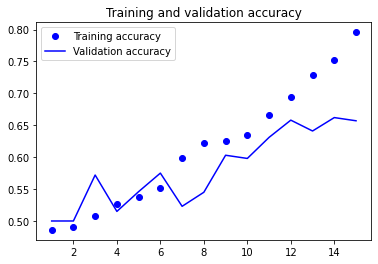

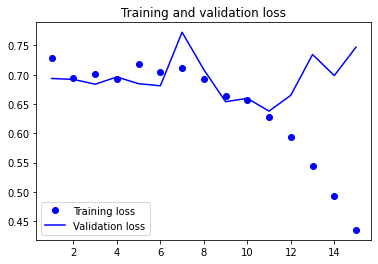

In [ ]:
accuracy = history1.history["accuracy"]
val_accuracy = history1.history["val_accuracy"]
loss = history1.history["loss"]
val_loss = history1.history["val_loss"]
epochs = range(1, len(accuracy) + 1)
plt.plot(epochs, accuracy, "bo", label="Training accuracy")
plt.plot(epochs, val_accuracy, "b", label="Validation accuracy")
plt.title("Training and validation accuracy")
plt.legend()
plt.figure()
plt.plot(epochs, loss, "bo", label="Training loss")
plt.plot(epochs, val_loss, "b", label="Validation loss")
plt.title("Training and validation loss")
plt.legend()
plt.show()


In [ ]:
test_model = keras.models.load_model('cnn.keras')
test_loss, test_acc = test_model.evaluate(test_dataset)
print(f"Test accuracy: {test_acc:.2f}")

63/63 [==============================] - 82s 1s/step - loss: 0.6551 - accuracy: 0.6130
Test accuracy: 0.61


**Observation:**
Adding additional convolution layers improves the overfitting tendency only marginally. The increase in the number of parameters makes it harder for the model to learn with the limited dataset. To help the model learn we use data agumentation. Data augmentation acts like synethic data generation. Randomly flipping, rotating and zooming will be used to present the model with different versions of a given image. Additionally, dropouts are used to control overfitting.

<a id='Modela_CNN_DataAug'></a>
## 4.0. Modela: CNN with Data Augmentation

In [27]:
data_augmentation = keras.Sequential(
    [
    layers.RandomFlip('horizontal_and_vertical'),
    layers.RandomRotation(0.1),
    layers.RandomZoom(0.2),
    ]
)

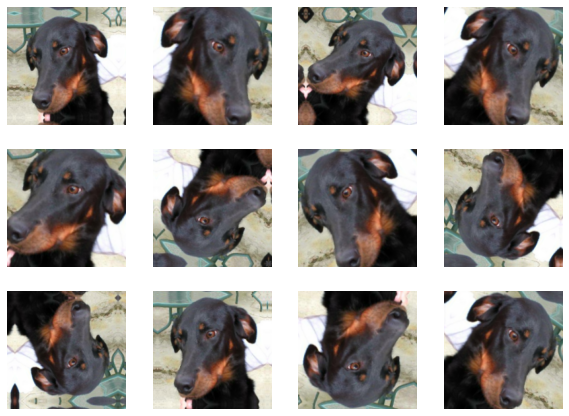

In [28]:
plt.figure(figsize=(10, 10))
for images, _ in train_dataset.take(1): 
    for i in range(12):
        augmented_images = data_augmentation(images) 
        ax = plt.subplot(4, 4, i + 1)
        plt.imshow(augmented_images[0].numpy().astype("uint8")) 
        plt.axis("off")

<a id='Modela_Architecture'></a>
## 4.1. Modela: Architecture

In [ ]:
modela = Sequential()
modela.add(data_augmentation)
modela.add(layers.Rescaling(1./255))
modela.add(layers.Conv2D(filters=32, kernel_size=3, activation="relu"))
modela.add(layers.Conv2D(filters=32, kernel_size=3, activation="relu"))
modela.add(layers.MaxPooling2D(pool_size=2))
modela.add(layers.Conv2D(filters=64, kernel_size=3, activation="relu"))
modela.add(layers.Conv2D(filters=64, kernel_size=3, activation="relu"))
modela.add(layers.MaxPooling2D(pool_size=2))
modela.add(layers.Conv2D(filters=128, kernel_size=3, activation="relu"))
modela.add(layers.Conv2D(filters=128, kernel_size=3, activation="relu"))
modela.add(layers.MaxPooling2D(pool_size=2))
modela.add(layers.Conv2D(filters=256, kernel_size=3, activation="relu"))
modela.add(layers.MaxPooling2D(pool_size=2))
modela.add(layers.Conv2D(filters=256, kernel_size=3, activation="relu"))
modela.add(layers.Flatten())
modela.add(layers.Dropout(0.5))
modela.add(layers.Dense(1,activation='sigmoid'))

In [ ]:
modela.compile(loss='binary_crossentropy',optimizer='rmsprop',metrics=['accuracy'])

<a id='Modela_Fit'></a>
## 4.2. Modela: Fit

In [ ]:
callbacks = [
             keras.callbacks.ModelCheckpoint(filepath="cnn_augmentation.keras",save_best_only=True,monitor='val_loss')
             ]
historya = modela.fit(train_dataset,
          epochs=25,
          validation_data=validation_dataset,
          callbacks=callbacks)

Epoch 1/25
63/63 [==============================] - 391s 6s/step - loss: 0.7049 - accuracy: 0.5020 - val_loss: 0.6931 - val_accuracy: 0.5000
Epoch 2/25
63/63 [==============================] - 387s 6s/step - loss: 0.6944 - accuracy: 0.4940 - val_loss: 0.6931 - val_accuracy: 0.5000
Epoch 3/25
63/63 [==============================] - 385s 6s/step - loss: 0.6937 - accuracy: 0.4965 - val_loss: 0.6931 - val_accuracy: 0.5000
Epoch 4/25
63/63 [==============================] - 385s 6s/step - loss: 0.6937 - accuracy: 0.4865 - val_loss: 0.6932 - val_accuracy: 0.5000
Epoch 5/25
63/63 [==============================] - 385s 6s/step - loss: 0.7015 - accuracy: 0.4985 - val_loss: 0.6928 - val_accuracy: 0.5000
Epoch 6/25
63/63 [==============================] - 385s 6s/step - loss: 0.6949 - accuracy: 0.4990 - val_loss: 0.6917 - val_accuracy: 0.5190
Epoch 7/25
63/63 [==============================] - 385s 6s/step - loss: 0.6930 - accuracy: 0.5220 - val_loss: 0.6894 - val_accuracy: 0.5000
Epoch 8/25
63

<a id='Modela_Evaluate'></a>
## 4.3. Modela: Evaluate

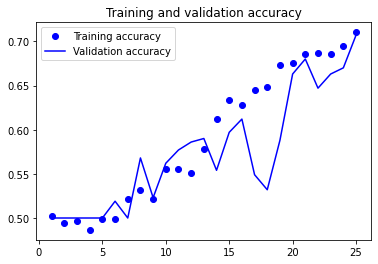

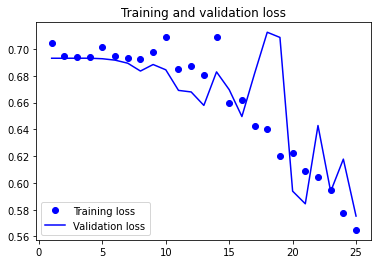

In [ ]:
accuracy = historya.history["accuracy"]
val_accuracy = historya.history["val_accuracy"]
loss = historya.history["loss"]
val_loss = historya.history["val_loss"]
epochs = range(1, len(accuracy) + 1)
plt.plot(epochs, accuracy, "bo", label="Training accuracy")
plt.plot(epochs, val_accuracy, "b", label="Validation accuracy")
plt.title("Training and validation accuracy")
plt.legend()
plt.figure()
plt.plot(epochs, loss, "bo", label="Training loss")
plt.plot(epochs, val_loss, "b", label="Validation loss")
plt.title("Training and validation loss")
plt.legend()
plt.show()

In [ ]:
test_model = keras.models.load_model('cnn_augmentation.keras')
test_loss, test_acc = test_model.evaluate(test_dataset)
print(f"Test accuracy: {test_acc:.2f}")

63/63 [==============================] - 83s 1s/step - loss: 0.5959 - accuracy: 0.6810
Test accuracy: 0.68


**Observation:**
The validation accuracy improves over epochs while the validation loss continues to drop. The plots suggest that overfitting has reduced. Clearly 25 epochs is insufficient as the trend suggests that with more epochs the accuracy will continue to improve and the loss will decrease. Next we try to simply the architecture of the model along with data augmentation and dropouts.